## Центральная предельная теорема своими руками

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF
from collections import Counter
from math import sqrt

%matplotlib inline

В качестве непрерывного распределения было выбрано хи-квадрат $\chi^2_k$ с натуральным параметром $k$ равным 9

In [2]:
rv = sts.chi2(9)

Создадим выборку объёмом 1000 

In [3]:
sample = rv.rvs(1000)

Построим графики теоретической функции распределения и эмпирической

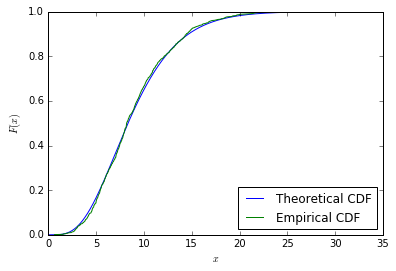

In [5]:
x = np.linspace(0,30,1000)
cdf = rv.cdf(x)
pdf = rv.pdf(x)

plt.plot(x, cdf, label="Theoretical CDF")

ecdf = ECDF(sample)

plt.plot(ecdf.x, ecdf.y, label="Empirical CDF")
plt.legend(loc="lower right")
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

plt.show()

Гистограмма выборки и график теоретической плотности распределения

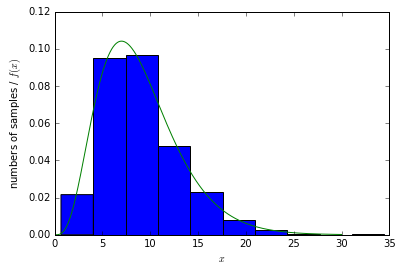

In [6]:
plt.hist(sample, normed=True)
plt.plot(x, pdf)

plt.ylabel('numbers of samples / $f(x)$')
plt.xlabel('$x$')

plt.show()

Создаём словарь __dict_of_samples__, ключи которого соответствуют объёму выборок (5, 10, 50, 100), а их значения представляют из себя одномерные массивы, значения которых являются выборочными средними для каждой выборки

In [17]:
dict_of_samples = Counter()

for n in [5, 10, 50, 100]:
    array_of_samples = np.empty([1000])
    for i in xrange(1000):
        array_of_samples[i] = rv.rvs(n).mean()
    
    dict_of_samples[n] = array_of_samples

Теоретическое математическое ожидание распределения хи-квадрат $\chi^2_k$ равно натуральному параметру $k$, что в нашем случае равно __9__, а его дисперсия - $2*k$. Подставим эти данные в ЦПТ и построим график функции нормального распределения выборочных средних, а также гистограммы ранее полученных выборок объёмом 5, 10, 50 и 100 

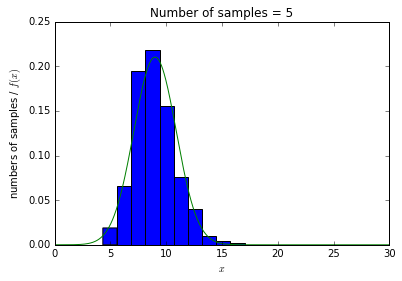

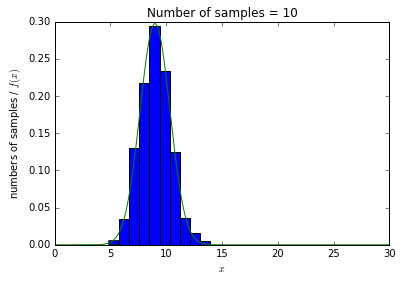

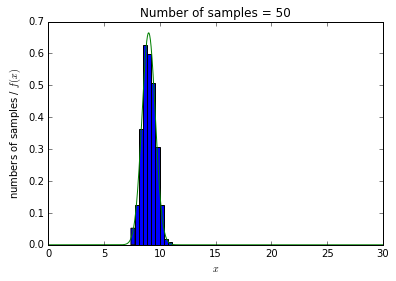

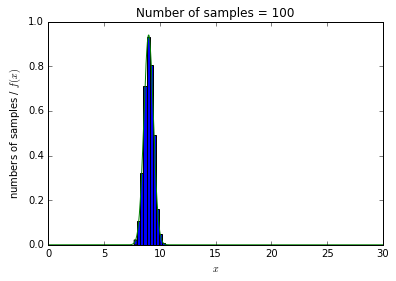

In [21]:
for n in [5, 10, 50, 100]:
    plt.hist(dict_of_samples[n], normed=True)
    mu = 9
    sigma = sqrt(float(2*9)/n)
    norm = sts.norm(loc=mu, scale=sigma)
    norm_pdf = norm.pdf(x)
    plt.plot(x, norm_pdf)
    
    plt.ylabel('numbers of samples / $f(x)$')
    plt.xlabel('$x$')
    plt.title('Number of samples = %s' % n)
    
    plt.show()

### Вывод

#### Проанализировав графики распределения плотностей, полученных с помощью Центральной предельная предельной теоремы, можно сделать вывод, что ЦПТ позволяет достаточно точно описывать выборочные средние величины распределения хи-квадрат с натуральным параметром равным 9. Также можно заметить, что с повышением объёма выборки увеличивается точность описания данного распределения.